<a href="https://colab.research.google.com/github/Aufa7/PASmp1/blob/main/MP_1_PAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_balita.csv')

In [ ]:
print(data.isnull().sum())

Umur (bulan)         0
Jenis Kelamin        0
Tinggi Badan (cm)    0
Status Gizi          0
dtype: int64


In [ ]:
#Pada langkah ini, kita memeriksa apakah dataset memiliki data kosong (NULL/NaN).
#Kenapa perlu?
#Data kosong bisa mengganggu proses perhitungan, sehingga perlu dihapus.
data = data.dropna()

In [ ]:
data

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted
...,...,...,...,...
120994,60,perempuan,100.600000,normal
120995,60,perempuan,98.300000,stunted
120996,60,perempuan,121.300000,normal
120997,60,perempuan,112.200000,normal


In [ ]:
target = data['Status Gizi']

In [ ]:
#Kolom Target: Kolom yang ingin diprediksi (di sini Status Gizi).
#Kolom Features: Kolom yang akan digunakan sebagai input model (di sini Umur (bulan), Jenis Kelamin, dan Tinggi Badan (cm)).
target = 'Status Gizi'
features = ['Umur (bulan)', 'Jenis Kelamin', 'Tinggi Badan (cm)']

X = data[features]
y = data[target]

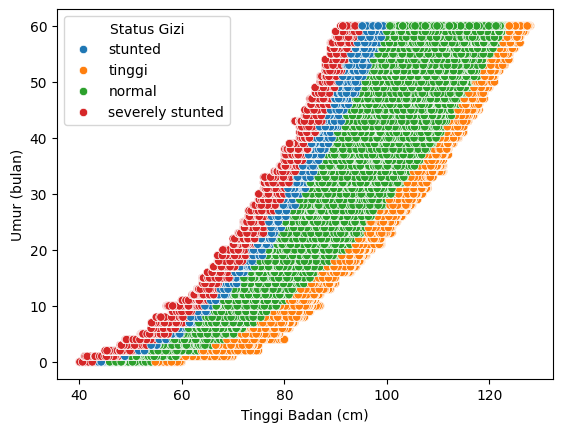

In [ ]:
#Sebelum melatih model, kita visualisasikan data untuk memahami pola antar variabel, seperti tinggi badan dan umur terhadap status gizi.
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=data, x='Tinggi Badan (cm)', y='Umur (bulan)', hue='Status Gizi')
plt.show()

In [ ]:
#Kolom Jenis Kelamin dan Status Gizi berbentuk string (teks). KNN hanya bisa bekerja dengan angka, jadi kita ubah teks menjadi angka menggunakan LabelEncoder.
from sklearn.preprocessing import LabelEncoder

# Ubah 'Jenis Kelamin' dan 'Status Gizi' menjadi angka
encoder = LabelEncoder()
X['Jenis Kelamin'] = encoder.fit_transform(X['Jenis Kelamin'])
y = encoder.fit_transform(y)  # Target juga diubah menjadi angka

<ipython-input-17-75c482e005e6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Jenis Kelamin'] = encoder.fit_transform(X['Jenis Kelamin'])


In [ ]:
#Pisahkan dataset menjadi
#Training set (80%): Data yang digunakan untuk melatih model.
#Testing set (20%): Data untuk menguji akurasi model.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
data

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted
...,...,...,...,...
120994,60,perempuan,100.600000,normal
120995,60,perempuan,98.300000,stunted
120996,60,perempuan,121.300000,normal
120997,60,perempuan,112.200000,normal


In [ ]:
#Pada langkah ini, kita memilih model KNN dan menentukan nilai K (jumlah tetangga). Nilai K dipilih berdasarkan aturan:

#Jika jumlah kategori target genap, gunakan K ganjil.
#Jika jumlah kategori target ganjil, gunakan K genap.

from sklearn.neighbors import KNeighborsClassifier

k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
#Gunakan model yang sudah dilatih untuk memprediksi hasil di data testing.
y_pred = knn.predict(X_test)

In [ ]:
#KNN menggunakan Euclidean Distance untuk menghitung jarak antara data baru dengan tetangganya.
import numpy as np

# Contoh menghitung jarak Euclidean antara dua data
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Contoh perhitungan antara baris pertama X_test dan X_train
distance = euclidean_distance(X_test.iloc[0], X_train.iloc[0])
print("Jarak Euclidean:", distance)

Jarak Euclidean: 6.870953354520749


In [ ]:
#Hitung metrik evaluasi seperti:

#Akurasi: Persentase prediksi yang benar.
#Precision & Recall: Mengukur kualitas prediksi per kelas.

from sklearn.metrics import accuracy_score, classification_report

# Akurasi
print("Akurasi:", accuracy_score(y_test, y_pred))

# Classification Report
print(classification_report(y_test, y_pred))

Akurasi: 0.9966115702479339
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13382
           1       0.99      1.00      1.00      4130
           2       0.99      0.99      0.99      2790
           3       1.00      1.00      1.00      3898

    accuracy                           1.00     24200
   macro avg       1.00      0.99      1.00     24200
weighted avg       1.00      1.00      1.00     24200

